# Workflow Stages

1. Question or problem definition.
2. Acquire training and testing dataset.
3. Wrangle, prepare and cleanse the data.
4. Analyze, identify patterns and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report and present the problem solving steps and final solution.
7. Supply and submit the result.

# Workflow Goals

**Classifying**: to classify or categorize the samples, understand the implications or correlation of different classes with solution goal.

**Correlating**: to determine correlation among features, which may help in creating, completing and correcting features.

**Converting**: features may be converted to equivalent values.

**Correcting**: to analyze the given training dataset for errors or possibily inaccurate values and try to correct or exclude them.

**Creating**: to create new features based on the original features.

**Charting**: to visualize the data.

### Best practices

* Performing feature correlation analysis early in the project.
* Using multiple plots instead of overlays for readability.


# 1. Problem Definition

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.


# 2. Acquiring Training and Testing Dataset

## Import Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random

# Visualization
import seaborn as sns
sns.set(font_scale=1.2)
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

print('OK')

OK


## Acquire Data

In [2]:
train_df = pd.read_csv('datasets/train.csv') # Training dataset
test_df = pd.read_csv('datasets/test.csv') # Testing dataset
combine_df = [train_df, test_df]

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## Describing Data

In [5]:
# Available features in the dataset
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
# Check numeric data types
cols = ['Pclass', 'SibSp', 'Parch']
for col in train_df[cols]:
    x = train_df[col].value_counts()
    print(col, x)

Pclass 3    491
1    216
2    184
Name: Pclass, dtype: int64
SibSp 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [7]:
# Check null value
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Categorical features:**
* **Categorical:** Survived, Sex, Embarked | **Ordinal:** Pclass

**Numerical features:** 
* **Continuous:** Age, Fare | **Discrete:** SibSp, Parch

**Mixed data types:** Ticket, Cabin

**Features may contain errors or typo:** Name

**Features contain null values:** Cabin > Age

7 features are int or float, 5 features are str.

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Otter, Mr. Richard",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


**Assumtions based on data analysis:**

**Correlating:** how well does each feature correlate with Survived.

**Completing:** complete Age, Embarked, Sex features because they are definitely correlated to Survived or other features.

**Correcting:** drop PassengerId, Name, Ticket, Cabin features.

**Creating:**
* Create new feature Family based on Parch & SibSp to get total count of members on board.
* Engineer the Name feature to extract Title as a new feature.
* Convert Age feature from numerical values into an ordinal categorical feature.
* Create a Fare range from Fare feature.

**Classifying:**
* Women (Sex=female) were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by Pivoting Table

Do so at this stage for features which do not have any empty values, in this problem which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch).

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* **Pclass:** there is a significant correlation between Pclass=1 (> 0.5) and Pclass=3.
* **Sex:** Sex=female had very high survival rate at 74%.
* **SibSp & Parch**: there is no correlation for the certain values. It may be best to derive new feature from these individual features.

## Analyze by Visualizing Data

**Correlating numercial features**

Start by understanding correlation between numerical features and Survived.

**A histogram chart is useful for analyzing continous numerical variables** like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

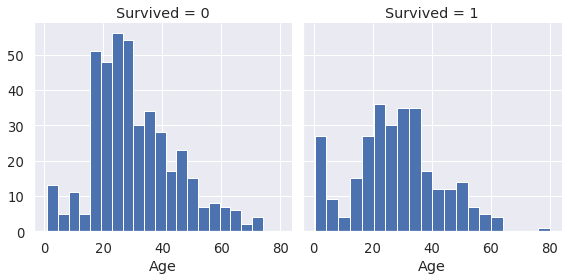

In [15]:
# Histogram of Age vs Survived
g = sns.FacetGrid(train_df, col='Survived', height=4)
g.map(plt.hist, 'Age', bins=20) # Number of columns in histogram

**Observations:**
* Infants (Age<4) had a higher survival rate than others.
* Oldest passengers (Age=80) survived.
* Large number of 18 - 25 years old did not survive.
* Most passengers are in age range of 18 - 35.

**Decisions:**
* Consider Age in training model.
* Fill null values of **Age**.
* Should band age group.

**Correlating numerical and ordinal features**

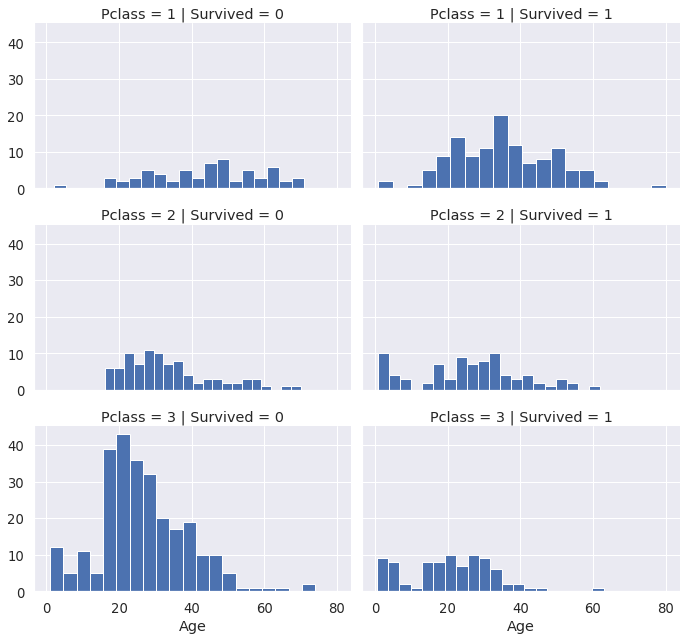

In [16]:
# Histogram of Age, Pclass vs Survived
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3, aspect=1.6)
g.map(plt.hist, 'Age', bins=20)
g.add_legend()

**Observations:**
* Pclass=3 had the most passengers, however most did not survive.
* Infants in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

**Decisions:**
* Consider Pclass for model training.

**Correlating categorical features**

/home/cuong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/cuong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


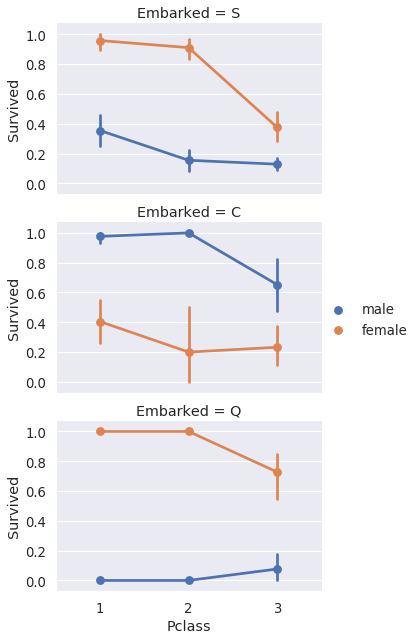

In [17]:
# Pointplot of Embarked, Pclass, Sex vs Survived
g = sns.FacetGrid(train_df, row='Embarked', height=3, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep') # x='Pclass', y='Survived', hue='Sex'
g.add_legend()

**Observations:**
* Female had a higher survival rate in total, but male had a higher survival rate in Pclass=2.
* There could be correlation between Pclass and Embarked and in turn Pclass and Survived.

**Decisions:**
* Add Sex to model training.
* Complete and add Embarked feature to model training.

**Correlating numerical and categorical features**

/home/cuong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


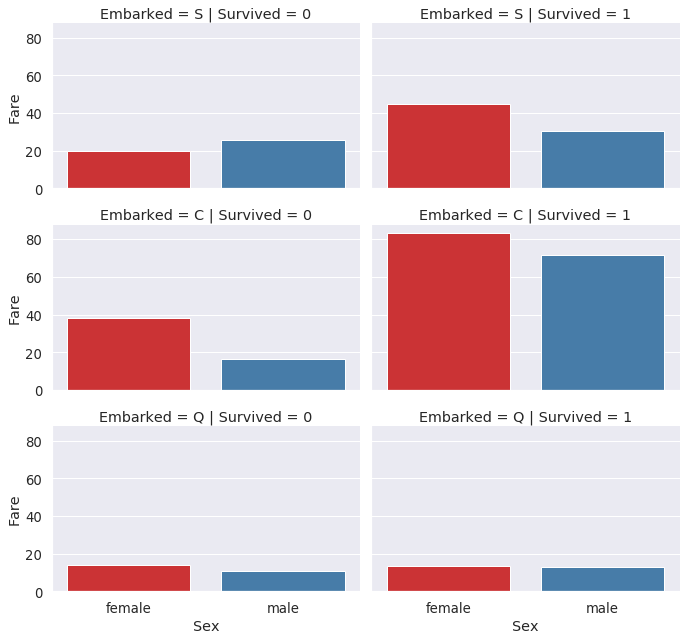

In [18]:
# Barplot of Sex, Fare, Embarked vs Survived
g = sns.FacetGrid(train_df, col='Survived', row='Embarked', height=3, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', palette='Set1', ci=None)
g.add_legend()

**Observations:**
* Higher fare paying passengers had better survival rate.
* Embarked=C had the most survived.

**Decisions:**
* Consider banding Fare feature.

# 3. Wrangling Data

## Dropping Features

In [19]:
print('Before', train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine_df = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


## Creating New Features Extracting from Existing

In [32]:
for df in combine_df:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex']) # Compute a simple cross tabulation of Title & Sex

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
# Replace rare titles with more common titles
for df in combine_df:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

train_df['Title']

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673
